In [20]:

from run_manifold import *
import run_deepmf
import pandas as pd
import sys
import os
import numpy as np
import torch
import DeepMF
import matplotlib.pyplot as plt
import seaborn as sns

M, N = 100, 60
index_name = 'cell_id'
cluster_label = 'cluster'

In [27]:
# swiss roll

data, color = make_swiss_roll(M, N)
data_df = pd.DataFrame(data)
data_df.index.name = index_name
meta_df = pd.DataFrame(color, columns=[cluster_label])
pca_df, tsne_df, umap_df, phate_df = run_deepmf.run_embedding(data_df, data_df.index, index_name)

Calculating PHATE...
  Running PHATE on 100 observations and 60 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 22
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.03 seconds.


epoch=0	batch=0	nan	0.0	9.19206714630127	nan
epoch=1	batch=0	nan	nan	9.191671371459961	nan
epoch=2	batch=0	nan	nan	nan	nan
epoch=3	batch=0	nan	nan	nan	nan
epoch=4	batch=0	nan	nan	nan	nan
epoch=5	batch=0	nan	nan	nan	nan
epoch=6	batch=0	nan	nan	nan	nan
epoch=7	batch=0	nan	nan	nan	nan
epoch=8	batch=0	nan	nan	nan	nan
epoch=9	batch=0	nan	nan	nan	nan


ValueError: zero-size array to reduction operation minimum which has no identity

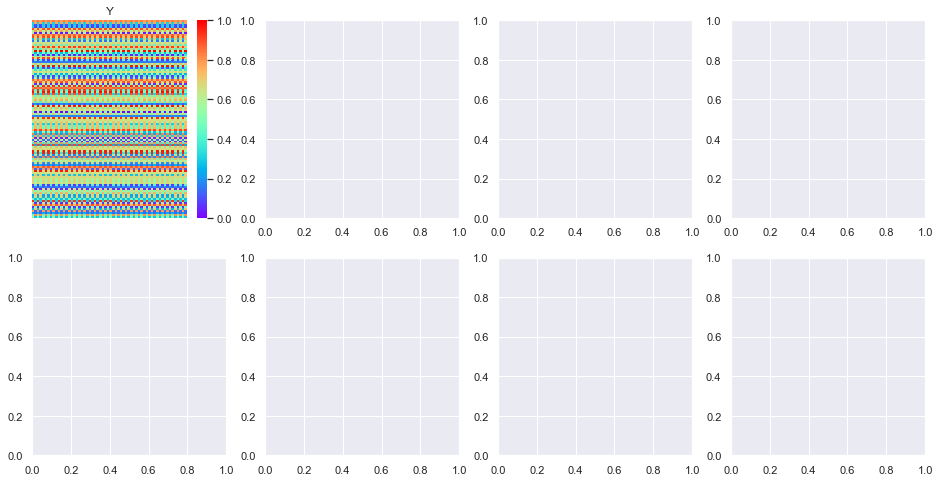

In [31]:
device = 'cpu'
K = 2

device = torch.device(device)
L = 3
n_batch = 10000

epoches = 10
model = DeepMF.DeepMF(M, N, K=K, L=L,
                          learning_rate=1e-3,
                          epoches=epoches,
                          neighbor_proximity = 'KL',
                          neighbor_k = 5,
                          device=device, problem='regression', data_type='impute')
model.fit(data, n_batch, delta=0.00001, alpha=1)


y_pred = model.predict(data)
U, V = model.save_U_V()
U_df = pd.DataFrame(U, columns=['e_DeepMF_U1', 'e_DeepMF_U2'])
run_deepmf.plot_embedding(data, y_pred, U_df, V, meta_df, cluster_label, pca_df, tsne_df, umap_df, phate_df)